In [103]:
import pandas as pd
df = pd.read_csv('garmin/Activities.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             82 non-null     object 
 1   Date                      82 non-null     object 
 2   Favorite                  82 non-null     bool   
 3   Title                     82 non-null     object 
 4   Distance                  82 non-null     float64
 5   Calories                  82 non-null     int64  
 6   Time                      82 non-null     object 
 7   Avg HR                    82 non-null     int64  
 8   Max HR                    82 non-null     int64  
 9   Avg Run Cadence           82 non-null     object 
 10  Max Run Cadence           82 non-null     object 
 11  Avg Pace                  82 non-null     object 
 12  Best Pace                 82 non-null     object 
 13  Total Ascent              82 non-null     object 
 14  Total Descen

In [104]:
df = df[['Date', 'Distance','Calories','Avg HR','Avg Run Cadence', 'Avg Pace', 'Best Pace', 
         'Avg Stride Length', 'Elapsed Time']]

In [105]:
#convert 'Date', 'Avg Pace', 'Best Pace', 'Elapsed Time' objects to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Avg Pace'] = pd.to_datetime(df['Avg Pace'], format='%M:%S')
df['Best Pace'] = pd.to_datetime(df['Best Pace'], format='%M:%S')
df['Elapsed Time'] = pd.to_datetime(df['Elapsed Time'])

In [106]:
#convert 'Avg Pace', 'Best Pace', 'Elapced Time' objects to the number of minutes
df['Avg Pace'] = df['Avg Pace'].dt.hour*60 + df['Avg Pace'].dt.minute + df['Avg Pace'].dt.second/60
df['Best Pace'] = df['Best Pace'].dt.hour*60 + df['Best Pace'].dt.minute + df['Best Pace'].dt.second/60
df['Elapsed Time'] = df['Elapsed Time'].dt.hour*60 + df['Elapsed Time'].dt.minute + df['Elapsed Time'].dt.second/60

In [107]:
#add 'Avg Speed' and 'Best Speed' columns
df['Avg Speed'] = 60 / df['Avg Pace']
df['Best Speed'] = 60 / df['Best Pace']

In [108]:
import numpy as np
df.replace({'--':np.nan},  inplace=True)

In [109]:
#convert remaining columns of object type to float64
s = df.select_dtypes(include='object').columns
df[s] = df[s].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               82 non-null     datetime64[ns]
 1   Distance           82 non-null     float64       
 2   Calories           82 non-null     int64         
 3   Avg HR             82 non-null     int64         
 4   Avg Run Cadence    81 non-null     float64       
 5   Avg Pace           82 non-null     float64       
 6   Best Pace          82 non-null     float64       
 7   Avg Stride Length  82 non-null     float64       
 8   Elapsed Time       82 non-null     float64       
 9   Avg Speed          82 non-null     float64       
 10  Best Speed         82 non-null     float64       
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 7.2 KB


In [110]:
df[df.isin(['--']).any(axis=1)]

,Date,Distance,Calories,Avg HR,Avg Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Elapsed Time,Avg Speed,Best Speed


Populating the interactive namespace from numpy and matplotlib


[Text(0.5, 1.0, 'Average HR Distribution')]

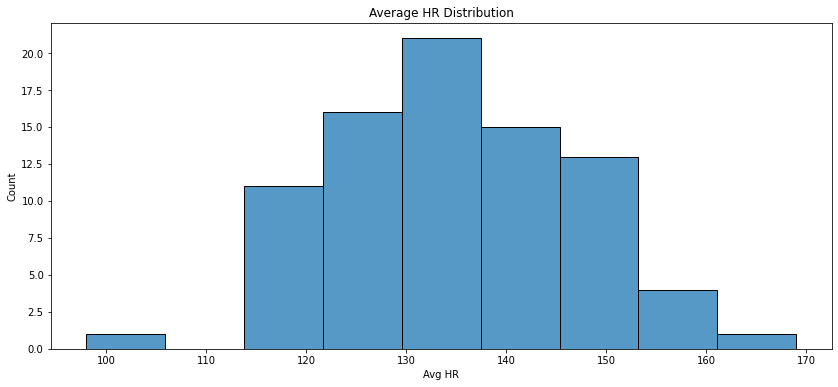

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.histplot(data = df, x='Avg HR').set(title = 'Average HR Distribution')

Correlation coefficient between cadence and speed: 0.7841079793392063


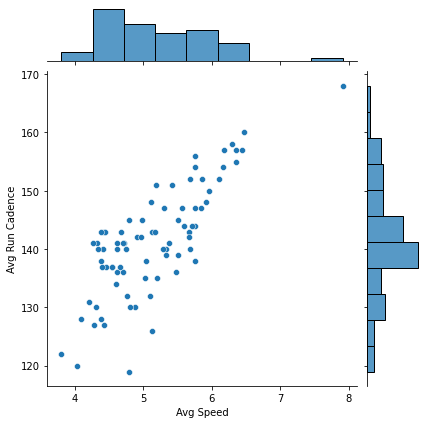

In [119]:
sns.jointplot(x='Avg Speed',y='Avg Run Cadence', data=df.dropna(),kind='scatter')
print("Correlation coefficient between cadence and speed:", df['Avg Speed'].corr(df['Avg Run Cadence']))

Correlation coefficient between stride length and speed: 0.7982976223204663


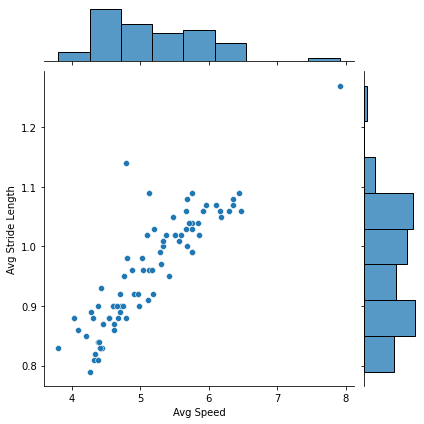

In [118]:
sns.jointplot(x='Avg Speed',y='Avg Stride Length', data=df.dropna(),kind='scatter')
print("Correlation coefficient between stride length and speed:", df['Avg Speed'].corr(df['Avg Stride Length']))

Correlation coefficient between stride length and run cadence: 0.4213359685994147


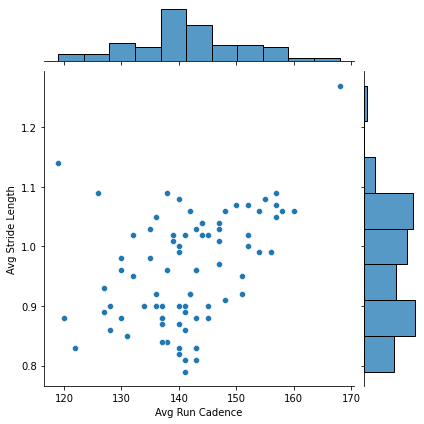

In [121]:
sns.jointplot(x='Avg Run Cadence',y='Avg Stride Length', data=df.dropna(),kind='scatter')
print("Correlation coefficient between stride length and run cadence:", 
      df['Avg Run Cadence'].corr(df['Avg Stride Length'].dropna()))

[Text(0.5, 1.0, 'Avg Speed by Month')]

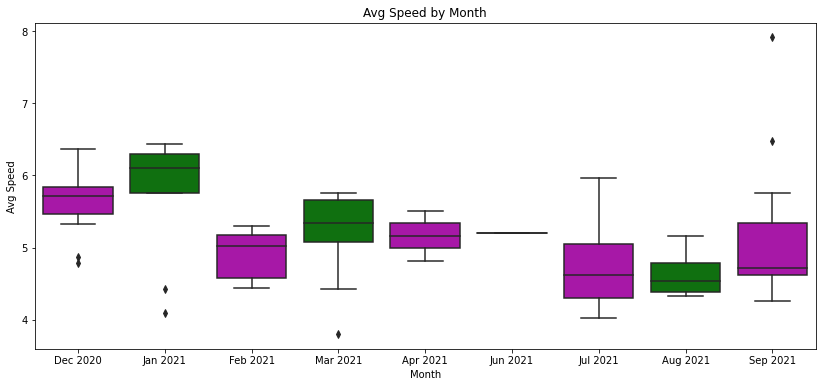

In [116]:
plt.figure(figsize=(14,6))
#add extra column with month for every running session
df['Month'] = df['Date'].dt.strftime('%b') + " " + df['Date'].dt.strftime('%Y') 
#sort datataset by date in ascending order
df.sort_values(by='Date', inplace=True)
#plot boxplots grouped by month
sns.boxplot(x='Month',y='Avg Speed', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Speed by Month')

[Text(0.5, 1.0, 'Avg Run Cadence by Month')]

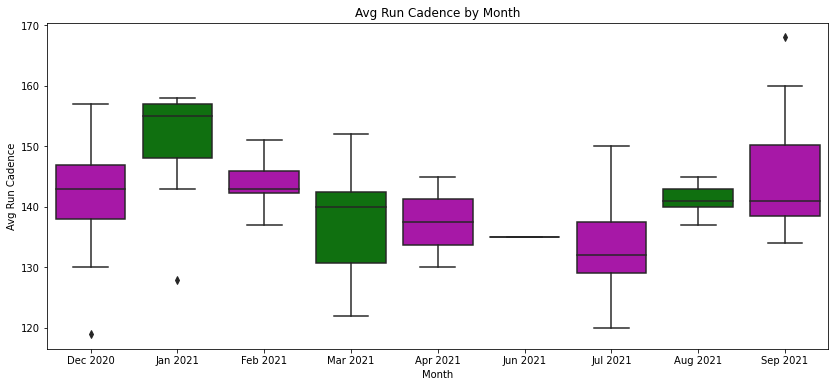

In [115]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Month',y='Avg Run Cadence', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Run Cadence by Month')

[Text(0.5, 1.0, 'Avg Stride Length by Month')]

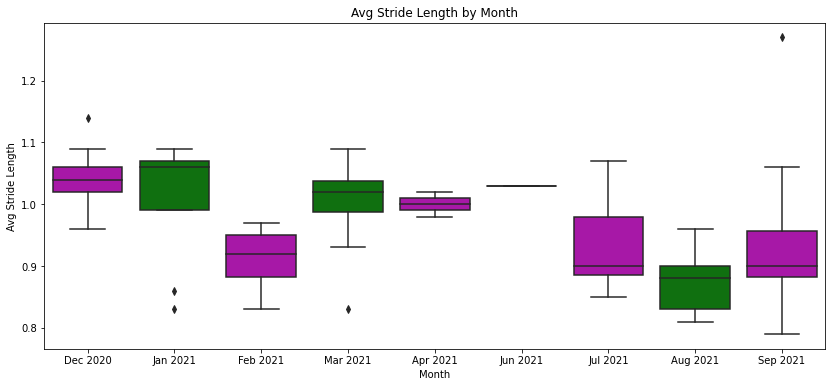

In [114]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Month',y='Avg Stride Length', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Stride Length by Month')

In [132]:
df['Count'] = 1
#aggregate data by week
dfW = df.groupby(pd.Grouper(key='Date',freq='W')).agg({'Count':'sum','Distance':'sum',
'Calories':'sum','Avg HR':'mean','Avg Run Cadence':'mean', 'Avg Speed':'mean','Best Speed':'mean', 
'Avg Pace':'mean', 'Best Pace':'mean', 'Avg Stride Length':'mean', 'Elapsed Time':'mean'}).reset_index()

dfM.head()

,Date,Count,Distance,Calories,Avg HR,Avg Run Cadence,Avg Speed,Best Speed,Avg Pace,Best Pace,Avg Stride Length,Elapsed Time
0,2020-12-31,13,29.83,3446,144.923077,141.769231,5.621969,9.013376,10.737179,6.761538,1.043077,24.176923
1,2021-01-31,9,26.05,3183,144.333333,150.444444,5.727311,10.702228,10.738889,6.155556,1.010000,30.022222
2,2021-02-28,7,10.53,1358,128.142857,143.833333,4.611806,8.628109,13.538095,8.061905,0.781429,24.747619
3,2021-03-31,12,23.35,3089,140.916667,137.333333,5.210111,12.832555,11.676389,5.311111,1.004167,25.198611
4,2021-04-30,2,2.39,314,135.500000,137.500000,5.162926,14.458764,11.675000,4.150000,1.000000,13.975000


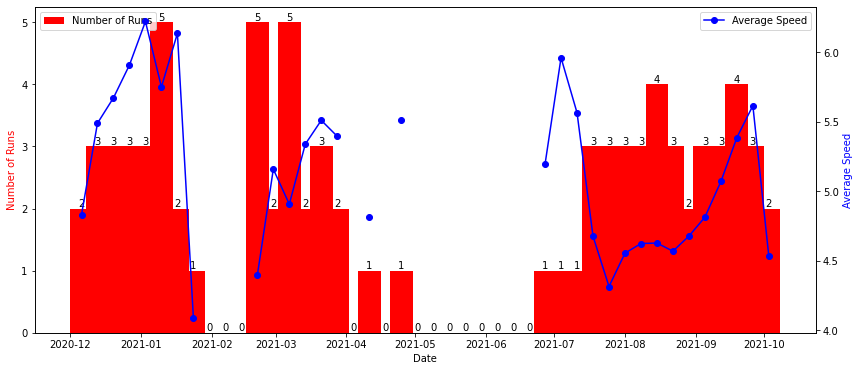

In [136]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(14,6))
# make a barplot
count = ax.bar(dfW['Date'], dfW['Count'],width=10, color='red',label='Number of Runs')
ax.bar_label(count)
# set x-axis label
ax.set_xlabel('Date')
ax.legend(loc=2)
# set y-axis label
ax.set_ylabel('Number of Runs',color='red')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfW['Date'],dfW['Avg Speed'],color='blue',marker='o',label='Average Speed')
ax2.set_ylabel('Average Speed',color='blue')
ax2.legend()
plt.show()

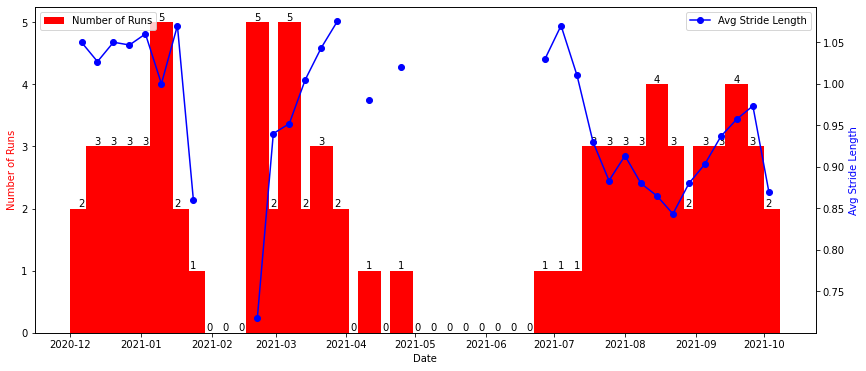

In [137]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(14,6))
# make a barplot
count = ax.bar(dfW['Date'], df_runningW['Count'],width=10, color='red',label='Number of Runs')
ax.bar_label(count)
# set x-axis label
ax.set_xlabel('Date')
ax.legend(loc=2)
# set y-axis label
ax.set_ylabel('Number of Runs',color='red')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfW['Date'],dfW['Avg Stride Length'],color='blue',marker='o',label='Avg Stride Length')
ax2.set_ylabel('Avg Stride Length',color='blue')
ax2.legend()
plt.show()

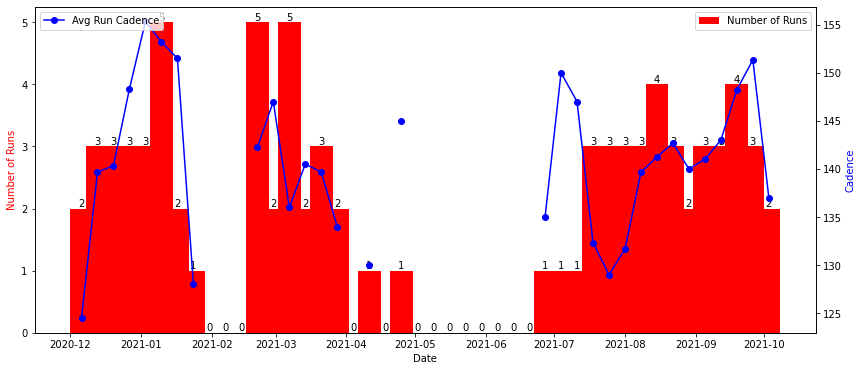

In [135]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(14,6))
# make a barplot
count = ax.bar(dfW['Date'], dfW['Count'],width=10, color='red',label='Number of Runs')
ax.bar_label(count)
# set x-axis label
ax.set_xlabel('Date')
ax.legend()
# set y-axis label
ax.set_ylabel('Number of Runs',color='red')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfW['Date'],dfW['Avg Run Cadence'],color='blue',marker='o',label='Avg Run Cadence')
ax2.set_ylabel('Cadence',color='blue')
ax2.legend(loc=2)
plt.show()